In [1]:
using PyPlot

In [2]:
td, tr = 2e-2, 2e-3 # synaptic decay time, synaptic rise time (sec)
dt, T = 5e-5, 0.1 # タイムステップ, シミュレーション時間 (sec)
nt = Int(T/dt) # シミュレーションの総ステップ

# 単一指数関数型シナプス
r_single = zeros(nt)
for t in 1:nt-1
    spike = ifelse(t == 1, 1, 0)
    r_single[t+1] = r_single[t]*(1-dt/td) + spike/td
    #r_single[t+1] = r_single[t]*exp(-dt/td) + spike/td
end

# 二重指数関数型シナプス
r_double, hr = zeros(nt), zeros(nt)
for t in 1:nt-1
    spike = ifelse(t == 1, 1, 0)
    r_double[t+1] = r_double[t]*(1-dt/tr) + hr[t]*dt
    hr[t+1] = hr[t]*(1-dt/td) + spike/(tr*td)
    #r_double[t+1] = r_double[t]*exp(-dt/tr) + hr[t]*dt
    #hr[t+1] = hr[t]*exp(-dt/td) + spike/(tr*td)
end   

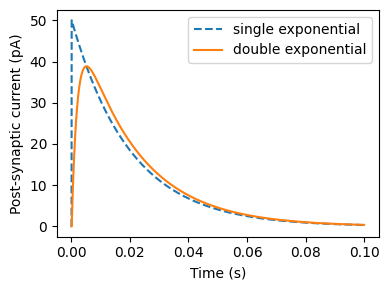

In [3]:
time = (1:nt)*dt
figure(figsize=(4, 3))
plot(time, r_single, linestyle="dashed", label="single exponential")
plot(time, r_double, label="double exponential")
xlabel("Time (s)"); ylabel("Post-synaptic current (pA)")
legend(); tight_layout()